**About Iris Dataset**

Best known database to be found in the pattern recognition literature. Data set- Iris flower data set(Donated date - 1988-07-01), also known as Fisher's Iris data set and Anderson's Iris data set b/c Edgar Anderson collected the data. It is multivariate(more than 2 dependent variable) data set Study of three related Iris flowers species. Data set contain 50 sample of each species(Iris-Setosa, Iris-Virginica, Iris-Versicolor)

**Features or attributes(4 numeric)-**

1. Sepal length in cm
2. Sepal width in cm
3.  Petal length in cm
4. Petal width in cm

**More on data set:-**

1. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other
2. Missing Attributes Values : None

**Summary Statistics**

                    **** Min  Max   Mean    SD      Class Correlation
    sepal length:   4.3  7.9   5.84     0.83       0.7826

    sepal width:    2.0  4.4   3.05    0.43       -0.4194

    petal length:   1.0  6.9   3.76     1.76       0.9490  (high!)

    petal width:    0.1  2.5   1.20     0.76       0.9565  (high!)

Class Distribution: 33.3% for each of 3 classes.

Images of Iris flowers species Iris_setosa -https://en.wikipedia.org/wiki/Iris_setosa

Iris_versicolor - [https://en.wikipedia.org/wiki/Iris_versicolor](http://)

Iris_virginica - https://en.wikipedia.org/wiki/Iris_virginica

How the biologist find the class of species- They use 4 features to find the species of Iris, due to this reason we are using 4 features. This tell us about the importance of domain knowledge


**Objective:-**
Classify a new flower as belonging to one of the 3 classes given the 4 features

**Here we start**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For graphical representation 
import seaborn as sns # Python visualization library based on matplotlib provides a high-level interface for drawing attractive statistical graphics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

ls: ../input: No such file or directory


CalledProcessError: Command '['ls', '../input']' returned non-zero exit status 1.

In [2]:
# Load the data set and see first 5 rows
a = pd.read_csv('../input/Iris.csv')
iris = pd.DataFrame(a)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# see the shape of data set
iris.shape

(150, 6)

In [4]:
# More depth on data set like all columns it's data type(along with its count), and memory usage 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
# We have 6 columns ID, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species
# Since column Id is no use so we need to remove it
# drop() is Data Frame method, arguments are 1arg- column to remove,
# 2arg -  axis(column wise(1) or row wise(0))
# 3arg - inplace(True = change should be reflected on data frame) 
#iris = iris.drop('Id',1, inplace = True)
#df.set_index('month')
iris.drop('Id', axis = 1, inplace = True)


In [6]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**What is data saying ?( Exploratory data analysis). Be a Sherlock Holmes**
We will try to find the answer of the following questions with the help of all avilable asset

    1. Descriptive statistics

    2. Class Distribution (Species counts are balanced or imbalanced)

    3. Univariate Plots:- Understand each attribute better.

       3.1 Box Plot - Distribution of attribute through their quartiles & find outlier

       3.2 Histogram - Distrbution of attribute through their bin, we find the distribution of attribute follow Gaussian or other distributions

    4. Multivariate Plots :- Understand the relationships between attributes & species better. (Which attributes contributes a lot in classifying species) 4.0 Scatter Plot - Sepal_Length_Width Vs Species.

        4.1 Scatter Plot - Petal_Length_Width Vs Species.

        4.2 Scatter Plot of all the attributes

        4.3 3D Plot

        4.4 Violinplot - Density of the length and width in the species




**1. Descriptive statistics**

In [7]:
# Descriptive statistics for whole data set
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Descriptive statistics for Iris-setosa
iris[iris['Species']=='Iris-setosa'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [9]:
# Descriptive statistics for Iris-versicolor
iris[iris['Species']=='Iris-versicolor'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [10]:
# Descriptive statistics for Iris-virginica
iris[iris['Species']=='Iris-virginica'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


**2. Class Distribution (Species counts are balanced or imbalanced)**

In [11]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

>**3 Univariate Plots :- Understand each attribute better.****

    3.1 Box Plot - Distribution of attribute through their quartiles & find outlier

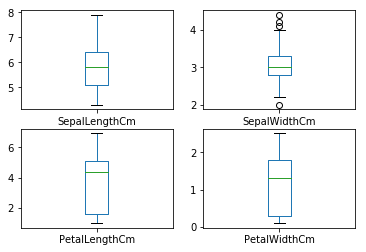

In [12]:
# Box and whisker plots(Give idea about distribution of input attributes)
iris.plot(kind = 'box', subplots = True, layout = (2, 2), sharex = False, sharey = False)
plt.show()

    3.2 Histogram - Distrbution of attribute through their bin, we find the distribution of attribute follow Gaussian or other distributions

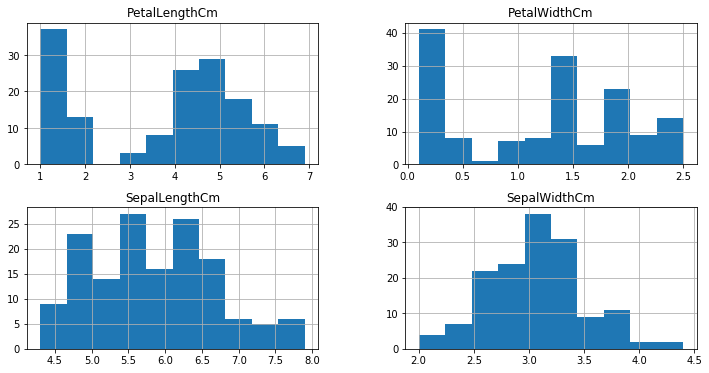

In [13]:
# Histograms of distribution of input attributes
iris.hist()
his = plt.gcf()
his.set_size_inches(12, 6)
plt.show()

Histograms shows that two of the input attribute have Gaussian distribution

> **4. Multivariate Plots:-**
 Understand the relationships between attributes & species better. (Which attributes contributes a lot in classifying species)
 
      4.0 Scatter Plot - Sepal_Length_Width Vs Species.
      4.1 Scatter Plot - Petal_Length_Width Vs Species.
      4.2 Scatter Plot of all the attributes 
      4.3 3D Plot
      4.4 Violinplot - Density of the length and width in the species


    4.0 Scatter Plot - Sepal_Length_Width Vs Species.

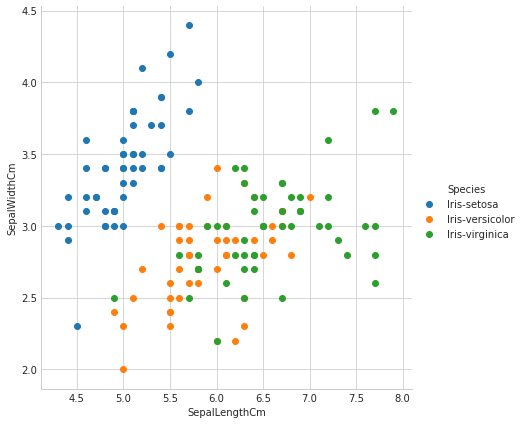

In [14]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue = 'Species', size = 6)\
.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
.add_legend()
plt.show()

**Observtions:**

    1. Using Sepal_Lenght & Sepal_Width features, we can only distinguish Setosa flower from others
    2. Seperating Versicolor & Virginica is much harder as they have considerable overlap
    3. Hence, Sepal_Lenght & Sepal_Width features only work well for Setosa



    4.1 Scatter Plot - Petal_Length_Width Vs Species.

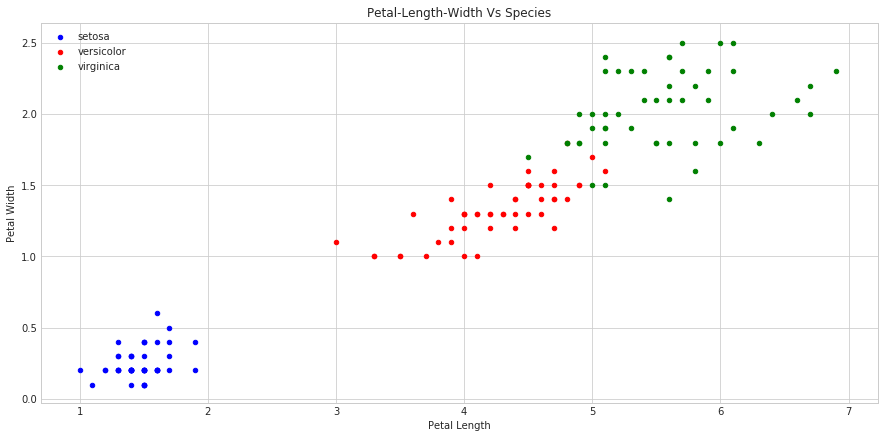

In [15]:
# Second find relationship between Petal length and width vs Species types
pet_len_wid = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm'
,color = 'blue', label = 'setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'red'
,label = 'versicolor', ax = pet_len_wid)
iris[iris.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'green'
,label = 'virginica', ax = pet_len_wid)
pet_len_wid.set_xlabel('Petal Length')
pet_len_wid.set_ylabel('Petal Width')
pet_len_wid.set_title('Petal-Length-Width Vs Species')
pet_len_wid = plt.gcf()
pet_len_wid.set_size_inches(15, 7)
plt.show()

**Observtions:**
  1.   Using Petal_Lenght & Petal_Width features, we can distinguish Setosa, Versicolor & Virginica fairly
  2.  There are slightly overlap of Versicolor & Virginica.
  3.  Graph shows that Petal (Length and Width) features are best contributor for Iris Species as compare to Sepal (Length and Width)



    4.2 Scatter Plot of all the attributes 

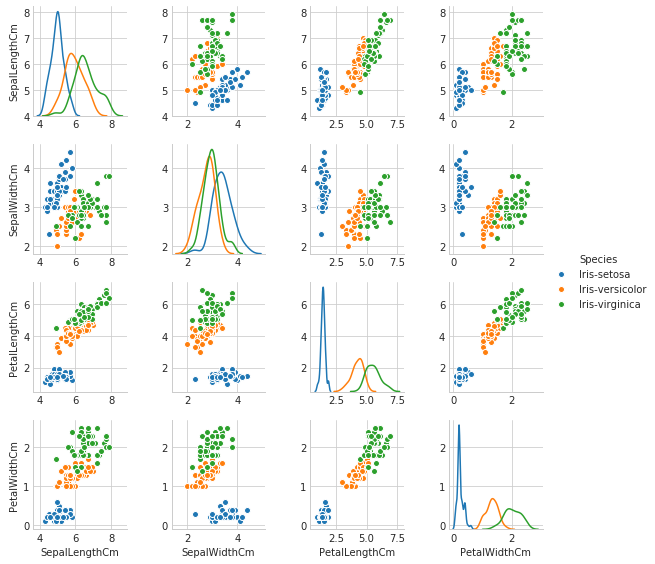

In [16]:
# Scatter plots of all pairs of attributes
plt.close()
sns.pairplot(iris, hue = 'Species', size = 2, diag_kind = 'kde')
plt.show()

4.3 3D Plot Plot of iris data set   http://plot.ly/pandas/3d-scatter-plots/

4.4 Violinplot - Density of the length and width in the species

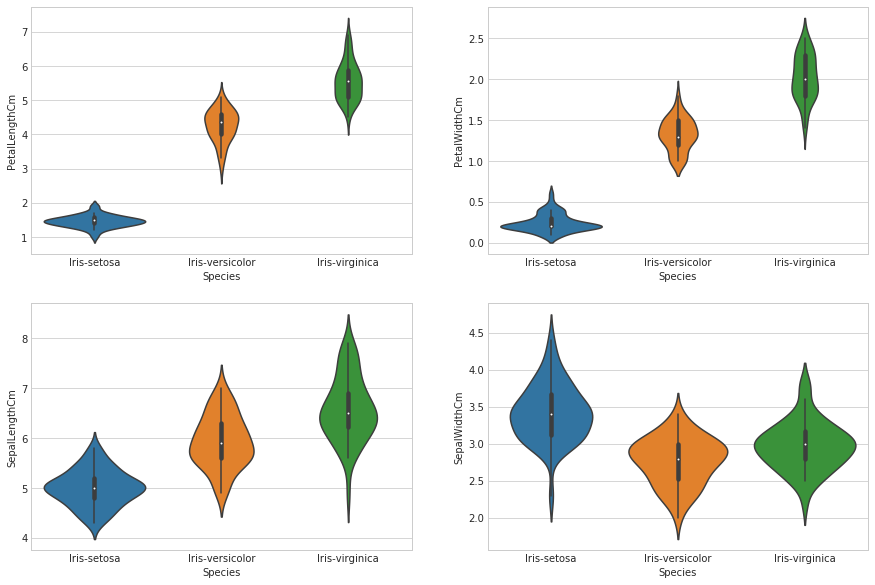

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)
plt.show()

> ***Machine Learning (Here comes the beauty of machine)***

Steps to implement the ML
1.  Import Library

2. Create Correlation Matrix

3. Spliting the Data Set
        3.1 Take all the data features
        3.2 Take only Sepal Features(Length & Width)
        3.3 Take only Petal Features(Length & Width)
        3.4 Take all relevant Features from correlation Matrix
        
4. Evaluate by using 6 different Algorithms(Cross Validation)
            4.1 Logistic Regression (LR)
            4.2 Linear Discriminant Analysis(LDA)
            4.3 K-Nearest Neighbour(KNN)
            4.4 Classification and Regression Tree(CART)
            4.5 Gaussion Naive Bayes(NB)
            4.6 Support Vector Machine
            
5. Final Evalution (Compare all model according to features selection and accuracy)

6. Deep Learning

**Import modules**

In [18]:
# Import modules
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [19]:
# We all ready loaded the data set
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Correlation Matrix**

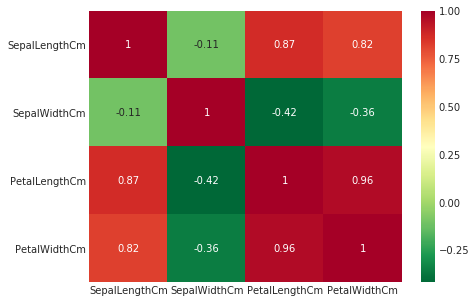

In [20]:
plt.figure(figsize=(7,5)) 
sns.heatmap(iris.corr(),annot=True,cmap='RdYlGn_r') 
plt.show()

**Spliting the Data Set**



In [21]:
test_size = 0.30
seed = 7
score = 'accuracy'

In [22]:
# Implementation of different ML Algorithms
def models(X_train, Y_train,score):
    clfs = []
    result = []
    names = []
    clfs.append(('LR', LogisticRegression()))
    clfs.append(('LDA', LinearDiscriminantAnalysis()))
    clfs.append(('KNN', KNeighborsClassifier()))
    clfs.append(('CART', DecisionTreeClassifier()))
    clfs.append(('NB', GaussianNB()))
    clfs.append(('SVM', SVC()))
    for algo_name, clf in clfs:
        k_fold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_score = model_selection.cross_val_score(clf, X_train, Y_train, cv=k_fold, scoring=score)
        #result = "%s: %f (%f)" % (algo_name, cv_score.mean(), cv_score.std())
        result.append((algo_name,cv_score.mean(), cv_score.std()))
        names.append(algo_name)
    return (result)

Take all the data features

In [23]:
X_all = iris.iloc[:,:4]
Y_all = iris.iloc[:,4] 

In [24]:
X_train_all, X_test_all, Y_train_all, Y_test_all = model_selection.train_test_split(X_all, Y_all, test_size=test_size, random_state=seed)

In [25]:
models(X_train_all, Y_train_all, score)

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


[('LR', 0.97090909090909094, 0.044499048183710609),
 ('LDA', 0.98000000000000009, 0.039999999999999994),
 ('KNN', 0.98000000000000009, 0.039999999999999994),
 ('CART', 0.96090909090909093, 0.047941079539764397),
 ('NB', 0.98090909090909084, 0.038235892445114709),
 ('SVM', 0.98999999999999999, 0.029999999999999992)]

In [26]:
# Evaluation of the Classifier 
# Predictions on test dataset
svm = SVC()
svm.fit(X_train_all, Y_train_all)
pred = svm.predict(X_test_all)
print(accuracy_score(Y_test_all, pred))
print(confusion_matrix(Y_test_all, pred))
print(classification_report(Y_test_all, pred))

0.955555555556
[[12  0  0]
 [ 0 14  2]
 [ 0  0 17]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.88      0.93        16
 Iris-virginica       0.89      1.00      0.94        17

    avg / total       0.96      0.96      0.96        45



Take only Sepal Features(Length & Width)

In [27]:
X_sep = iris[['SepalLengthCm','SepalWidthCm']]
Y_sep = iris.Species

In [28]:
X_train_sep, X_test_sep, Y_train_sep, Y_test_sep = model_selection.train_test_split(X_sep, Y_sep, test_size=test_size, random_state=seed)

In [29]:
models(X_train_sep, Y_train_sep, score)

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


[('LR', 0.73181818181818181, 0.10796770254751387),
 ('LDA', 0.80727272727272725, 0.077970115063242071),
 ('KNN', 0.81999999999999995, 0.084969610513075791),
 ('CART', 0.72181818181818191, 0.084813845743204413),
 ('NB', 0.83818181818181814, 0.086702683764119007),
 ('SVM', 0.84727272727272729, 0.088867995707999539)]

In [30]:
# Evaluation of the Classifier 
# Predictions on test dataset
svm = SVC()
svm.fit(X_train_sep, Y_train_sep)
pred = svm.predict(X_test_sep)
print(accuracy_score(Y_test_sep, pred))
print(confusion_matrix(Y_test_sep, pred))
print(classification_report(Y_test_sep, pred))

0.711111111111
[[11  1  0]
 [ 0 10  6]
 [ 0  6 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.92      0.96        12
Iris-versicolor       0.59      0.62      0.61        16
 Iris-virginica       0.65      0.65      0.65        17

    avg / total       0.72      0.71      0.72        45



Take only Petal Features(Length & Width)

In [31]:
X_p = iris[['PetalLengthCm','PetalWidthCm']]
Y_p = iris.Species

In [32]:
X_train_p, X_test_p, Y_train_p, Y_test_p = model_selection.train_test_split(X_p, Y_p, test_size=test_size, random_state=seed)

In [33]:
models(X_train_p, Y_train_p, score)

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


[('LR', 0.86454545454545451, 0.1172304363491477),
 ('LDA', 0.98090909090909084, 0.038235892445114709),
 ('KNN', 0.98000000000000009, 0.039999999999999994),
 ('CART', 0.97000000000000008, 0.045825756949558392),
 ('NB', 0.98000000000000009, 0.039999999999999994),
 ('SVM', 0.98999999999999999, 0.029999999999999992)]

In [34]:
# Evaluation of the Classifier 
# Predictions on test dataset
svm = SVC()
svm.fit(X_train_p, Y_train_p)
pred = svm.predict(X_test_p)
print(accuracy_score(Y_test_p, pred))
print(confusion_matrix(Y_test_p, pred))
print(classification_report(Y_test_p, pred))

0.933333333333
[[12  0  0]
 [ 0 14  2]
 [ 0  1 16]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      0.88      0.90        16
 Iris-virginica       0.89      0.94      0.91        17

    avg / total       0.93      0.93      0.93        45



> Take all relevant Features from correlation Matrix

In [35]:
X_rel = iris[['PetalWidthCm', 'SepalLengthCm','SepalWidthCm' ]]
Y_rel = iris.Species

In [36]:
X_train_rel, X_test_rel, Y_train_rel, Y_test_rel = model_selection.train_test_split(X_rel, Y_rel, test_size=test_size, random_state=seed)

In [37]:
models(X_train_rel, Y_train_rel, score)

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


[('LR', 0.90363636363636368, 0.098350024263989241),
 ('LDA', 0.98090909090909084, 0.038235892445114709),
 ('KNN', 0.96090909090909093, 0.06556178084401014),
 ('CART', 0.95272727272727276, 0.062430126230506887),
 ('NB', 0.96181818181818168, 0.064769138656570455),
 ('SVM', 0.98090909090909084, 0.038235892445114709)]

In [38]:
# Evaluation of the Classifier 
# Predictions on test dataset
svm = SVC()
svm.fit(X_train_rel, Y_train_rel)
pred = svm.predict(X_test_rel)
print(accuracy_score(Y_test_rel, pred))
print(confusion_matrix(Y_test_rel, pred))
print(classification_report(Y_test_rel, pred))

0.911111111111
[[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88        16
 Iris-virginica       0.88      0.88      0.88        17

    avg / total       0.91      0.91      0.91        45



> Take all relevant Features from correlation Matrix

In [39]:
X_rel1 = iris[['PetalLengthCm', 'SepalLengthCm','SepalWidthCm' ]]
Y_rel1 = iris.Species

In [40]:
X_train_rel1, X_test_rel1, Y_train_rel1, Y_test_rel1 = model_selection.train_test_split(X_rel1, Y_rel1, test_size=test_size, random_state=seed)

In [41]:
models(X_train_rel1, Y_train_rel1, score)

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


[('LR', 0.90272727272727271, 0.08757995166637339),
 ('LDA', 0.95999999999999996, 0.066332495807107983),
 ('KNN', 0.95999999999999996, 0.048989794855663543),
 ('CART', 0.95090909090909093, 0.066456970481807501),
 ('NB', 0.91272727272727272, 0.094142497934542685),
 ('SVM', 0.97000000000000008, 0.045825756949558392)]

In [42]:
# Evaluation of the Classifier 
# Predictions on test dataset
svm = SVC()
svm.fit(X_train_rel1, Y_train_rel1)
pred = svm.predict(X_test_rel1)
print(accuracy_score(Y_test_rel1, pred))
print(confusion_matrix(Y_test_rel1, pred))
print(classification_report(Y_test_rel1, pred))

0.911111111111
[[12  0  0]
 [ 0 15  1]
 [ 0  3 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.93      0.82      0.87        17

    avg / total       0.92      0.91      0.91        45



# Final Evaluation

> Note:- Testing dataset size(validation size) is small 

    Case  Features Use        Best Model    Train Accuracy    Test Accuracy Missclassified

      1   All Features in          SVM         .9899           .9555            2classes
  
      2   Sepal only               SVM         .8472           .7111              12 
   
      3   Petal only               SVM         .9899           .9333              3
  
      4   PetalWidth,Sepal(Len,Wid)SVM/LDA     .9809           .9111              4
  
      5   PetalLen,Sepal(Len,Wid)  SVM         .9700           .9111              4

**Deep Learning**

In [43]:
# MLP with automatic validation set
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [44]:
a = pd.read_csv('../input/Iris.csv', header = None)
i = pd.DataFrame(a)
iris = i.values

In [45]:
X = iris[1:, 1:5].astype(float)
Y = iris[1:, 5]


In [46]:
X[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [47]:
Y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [48]:
# Set Seed
seed = 7
np.random.seed(seed)

In [49]:
# Label encode Class (Species)
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# One Hot Encode
y_dummy = np_utils.to_categorical(encoded_Y)

In [50]:
# Deep Learnig Function
def deepml_model():
    # Model Creation
    deepml = Sequential()
    deepml.add(Dense(8, input_dim=4, activation='relu'))
    deepml.add(Dense(3, activation='softmax'))
    # Model Compilation
    deepml.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return deepml

In [51]:
estimate = KerasClassifier(build_fn=deepml_model, epochs=200, batch_size=5, verbose=0)

In [52]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [53]:
results = cross_val_score(estimate, X, y_dummy, cv=k_fold)
print("Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model: 97.33% (4.42%)
